# Microsoft Stock Price Forecasting

Data Source: tiingo api
https://api.tiingo.com/documentation/general/overview

Objective: To learn how Deep neural network can be used in forecasting stock price



## Reading Dataset

In [87]:
import pandas_datareader as pdr

In [147]:
df=pdr.get_data_tiingo("MSFT",api_key="4751740f6e90d646c9df7e7ce9d05f96c87030dd")

In [148]:
df.head(10)

close   high    low   open    volume  \
symbol date                                                              
MSFT   2017-08-14 00:00:00+00:00  73.59  73.72  72.95  73.06  19756773   
       2017-08-15 00:00:00+00:00  73.22  73.59  73.04  73.59  17791179   
       2017-08-16 00:00:00+00:00  73.65  74.10  73.17  73.34  17814317   
       2017-08-17 00:00:00+00:00  72.40  73.87  72.40  73.58  21834250   
       2017-08-18 00:00:00+00:00  72.49  72.84  71.93  72.27  18215276   
       2017-08-21 00:00:00+00:00  72.15  72.48  71.70  72.47  17656716   
       2017-08-22 00:00:00+00:00  73.16  73.24  72.35  72.35  14183146   
       2017-08-23 00:00:00+00:00  72.72  73.15  72.53  72.96  13586784   
       2017-08-24 00:00:00+00:00  72.69  72.86  72.07  72.74  15980144   
       2017-08-25 00:00:00+00:00  72.82  73.35  72.48  72.86  12574503   

                                   adjClose    adjHigh     adjLow    adjOpen  \
symbol date                                                                    
MSFT   2017-08-14 00:00:00+00:00  68.910409  69.032143  68.311107  68.414112   
       2017-08-15 00:00:00+00:00  68.929138  69.277455  68.759686  69.277455   
       2017-08-16 00:00:00+00:00  69.333939  69.757568  68.882068  69.042105   
       2017-08-17 00:00:00+00:00  68.157192  69.541046  68.157192  69.268041   
       2017-08-18 00:00:00+00:00  68.241917  68.571406  67.714735  68.034810   
       2017-08-21 00:00:00+00:00  67.921842  68.232503  67.498213  68.223089   
       2017-08-22 00:00:00+00:00  68.872654  68.947966  68.110122  68.110122   
       2017-08-23 00:00:00+00:00  68.458439  68.863240  68.279573  68.684374   
       2017-08-24 00:00:00+00:00  68.430197  68.590234  67.846530  68.477267   
       2017-08-25 00:00:00+00:00  68.552579  69.051519  68.232503  68.590234   

                                  adjVolume  divCash  splitFactor  
symbol date                                                        
MSFT   2017-08-14 00:00:00+00:00   19756773     0.00          1.0  
       2017-08-15 00:00:00+00:00   17791179     0.39          1.0  
       2017-08-16 00:00:00+00:00   17814317     0.00          1.0  
       2017-08-17 00:00:00+00:00   21834250     0.00          1.0  
       2017-08-18 00:00:00+00:00   18215276     0.00          1.0  
       2017-08-21 00:00:00+00:00   17656716     0.00          1.0  
       2017-08-22 00:00:00+00:00   14183146     0.00          1.0  
       2017-08-23 00:00:00+00:00   13586784     0.00          1.0  
       2017-08-24 00:00:00+00:00   15980144     0.00          1.0  
       2017-08-25 00:00:00+00:00   12574503     0.00          1.0

In [149]:
df.to_csv("MSFT.csv")

In [150]:
import pandas as pd


In [151]:
df=pd.read_csv("MSFT.csv")

## Data Exploration

In [152]:
df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,MSFT,2017-08-14 00:00:00+00:00,73.59,73.72,72.95,73.06,19756773,68.910409,69.032143,68.311107,68.414112,19756773,0.00,1.0
1,MSFT,2017-08-15 00:00:00+00:00,73.22,73.59,73.04,73.59,17791179,68.929138,69.277455,68.759686,69.277455,17791179,0.39,1.0
2,MSFT,2017-08-16 00:00:00+00:00,73.65,74.10,73.17,73.34,17814317,69.333939,69.757568,68.882068,69.042105,17814317,0.00,1.0
3,MSFT,2017-08-17 00:00:00+00:00,72.40,73.87,72.40,73.58,21834250,68.157192,69.541046,68.157192,69.268041,21834250,0.00,1.0
4,MSFT,2017-08-18 00:00:00+00:00,72.49,72.84,71.93,72.27,18215276,68.241917,68.571406,67.714735,68.034810,18215276,0.00,1.0


In [153]:
df.columns

Index(['symbol', 'date', 'close', 'high', 'low', 'open', 'volume', 'adjClose',
       'adjHigh', 'adjLow', 'adjOpen', 'adjVolume', 'divCash', 'splitFactor'],
      dtype='object')

In [154]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1257 entries, 0 to 1256
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   symbol       1257 non-null   object 
 1   date         1257 non-null   object 
 2   close        1257 non-null   float64
 3   high         1257 non-null   float64
 4   low          1257 non-null   float64
 5   open         1257 non-null   float64
 6   volume       1257 non-null   int64  
 7   adjClose     1257 non-null   float64
 8   adjHigh      1257 non-null   float64
 9   adjLow       1257 non-null   float64
 10  adjOpen      1257 non-null   float64
 11  adjVolume    1257 non-null   int64  
 12  divCash      1257 non-null   float64
 13  splitFactor  1257 non-null   float64
dtypes: float64(10), int64(2), object(2)
memory usage: 137.6+ KB


In [155]:
df["close"].describe()

count    1257.000000
mean      180.783361
std        78.558147
min        72.150000
25%       107.710000
50%       162.010000
75%       251.490000
max       343.110000
Name: close, dtype: float64

In [156]:
print("Start date", df.date[0])
print("End date", df.date[1256])


Start date 2017-08-14 00:00:00+00:00
End date 2022-08-10 00:00:00+00:00


In [157]:
data=df.reset_index()["close"]

In [158]:
data

0        73.59
1        73.22
2        73.65
3        72.40
4        72.49
         ...  
1252    283.65
1253    282.91
1254    280.32
1255    282.30
1256    289.16
Name: close, Length: 1257, dtype: float64

## How Many years of data it is

In [159]:
weekdays=2*4*12
working_days= 365-weekdays
len(data)/working_days

4.672862453531598

## Data Visualization

So, Data is around of 5 years

In [160]:
import matplotlib.pyplot as plt
import seaborn as sns

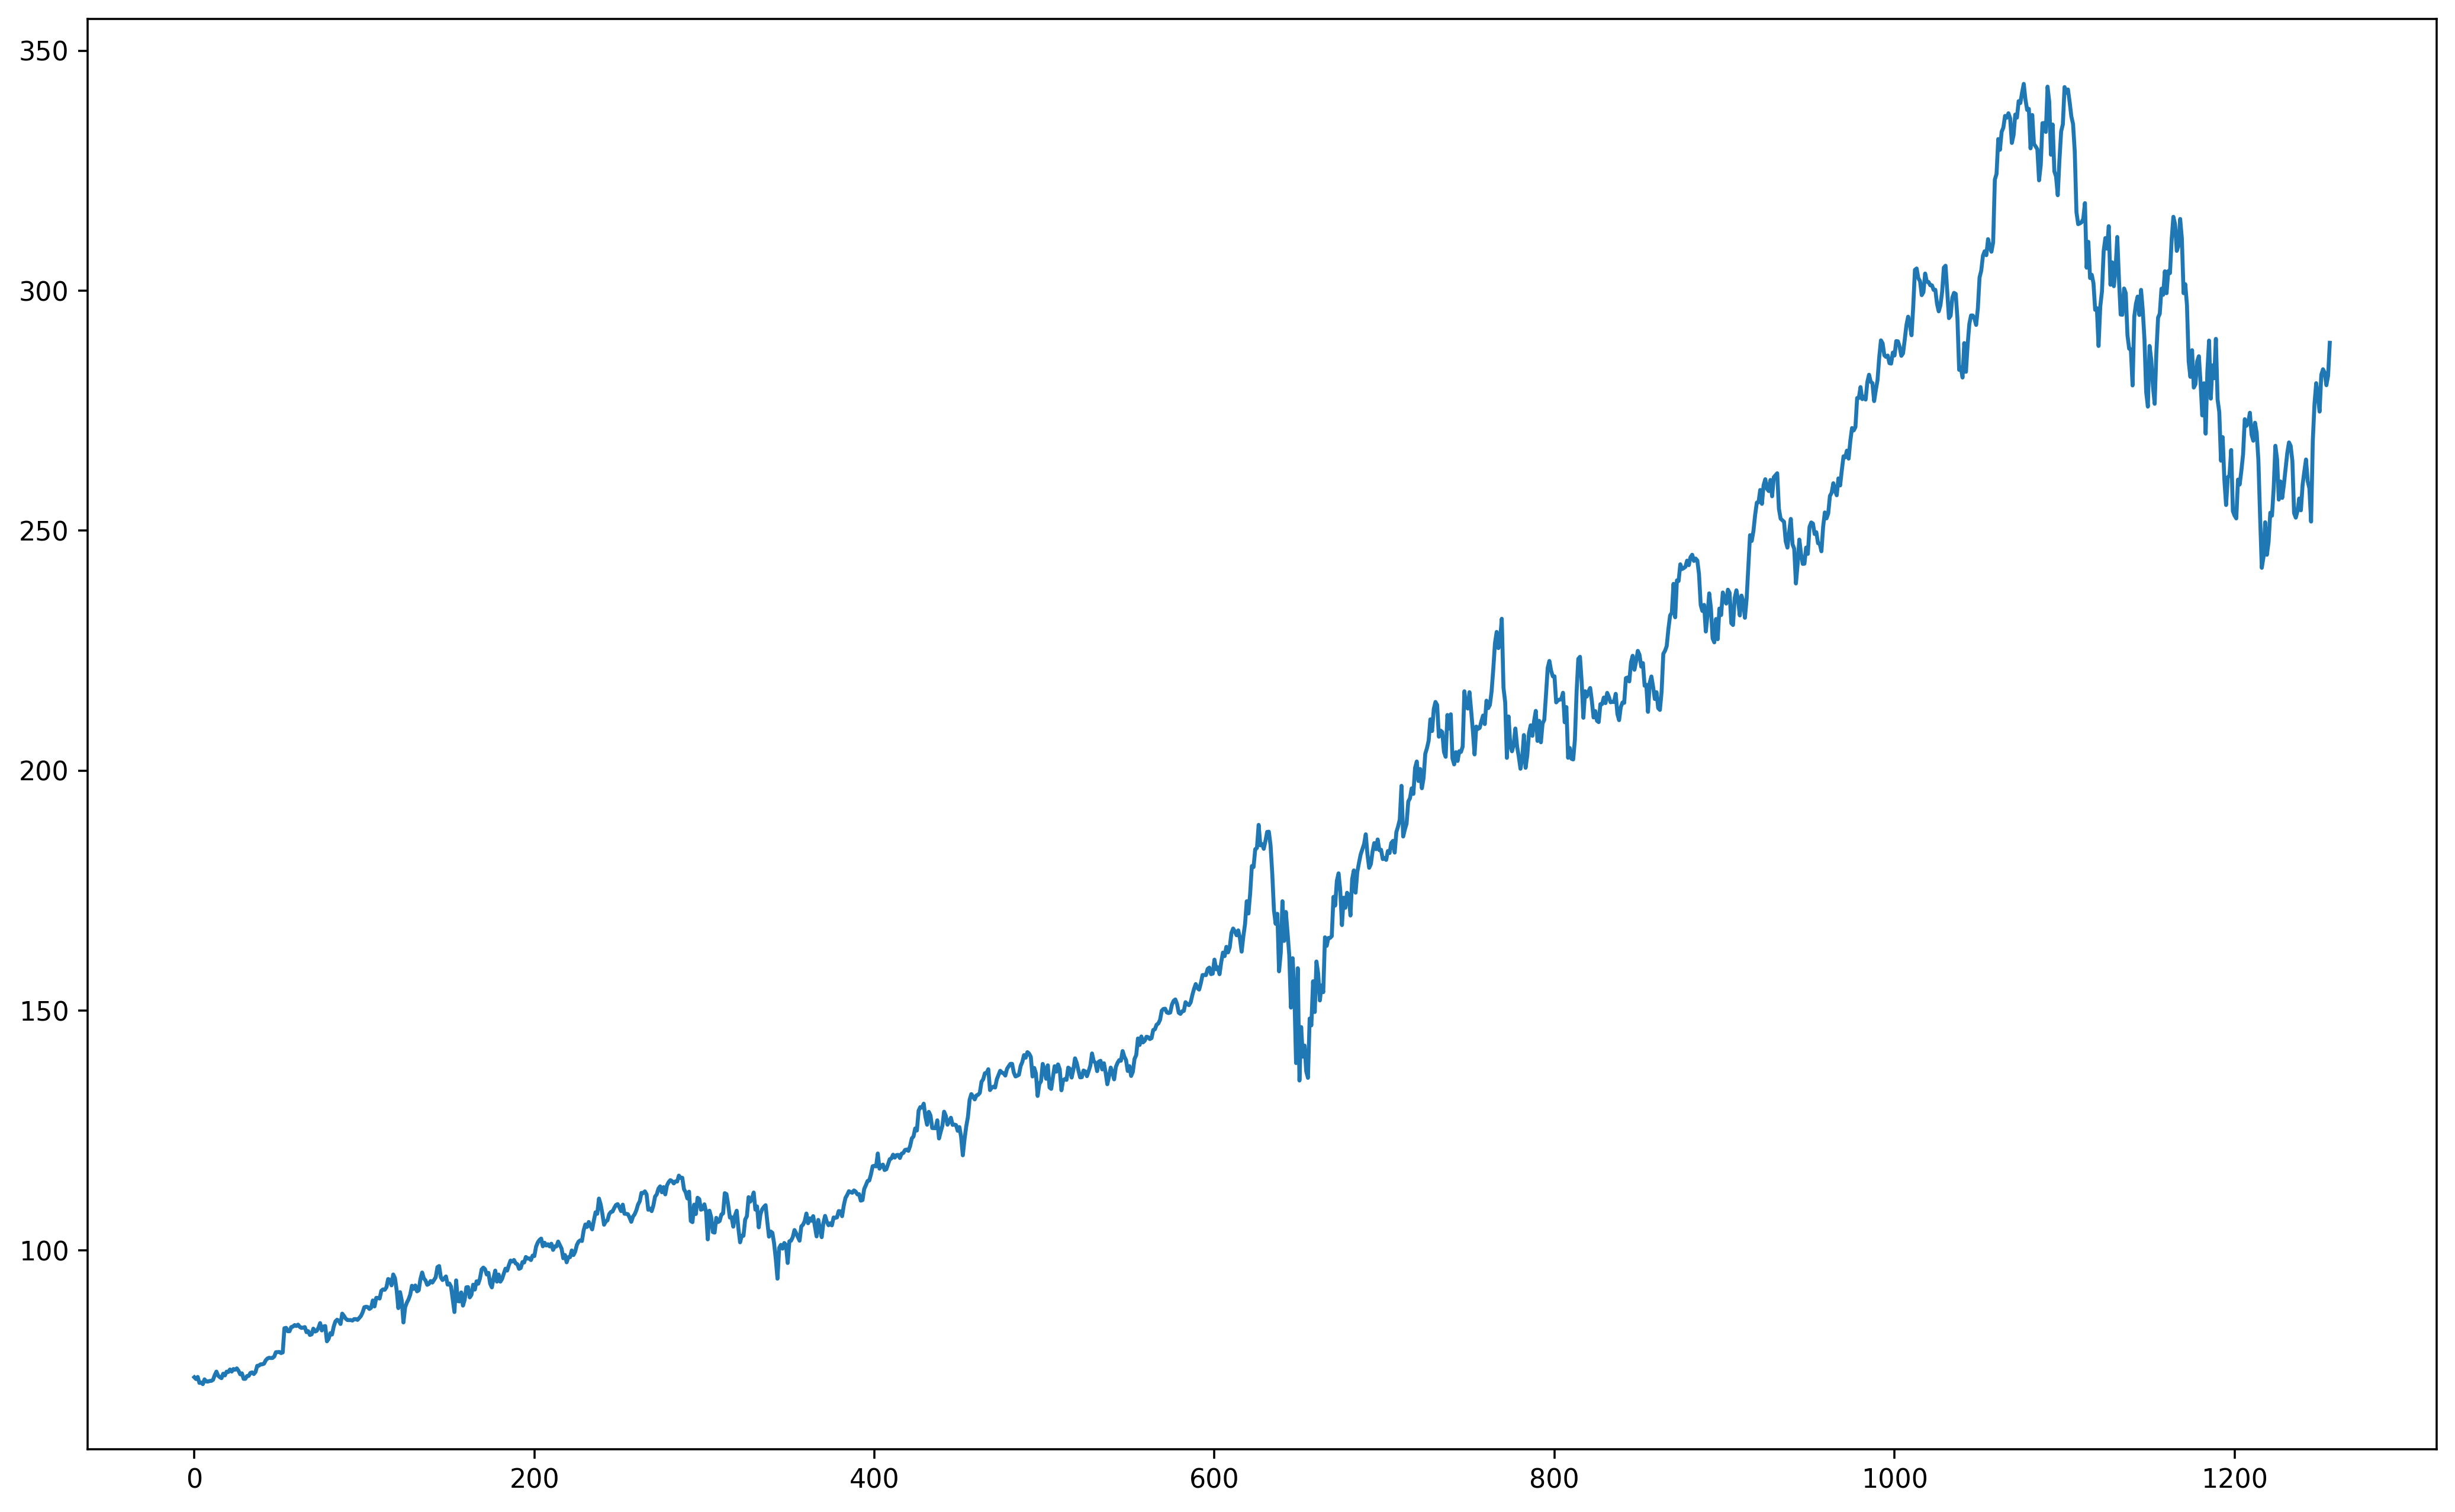

In [161]:
plt.figure(figsize=(16,10),dpi=320)
plt.plot(data)

<AxesSubplot:ylabel='close'>

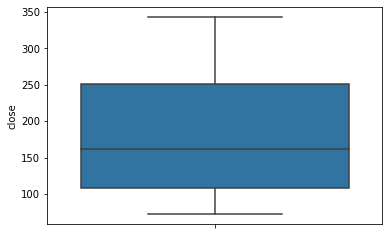

In [162]:
sns.boxplot(y=data)

 Data Does not have any outlier

## One Year Dataset


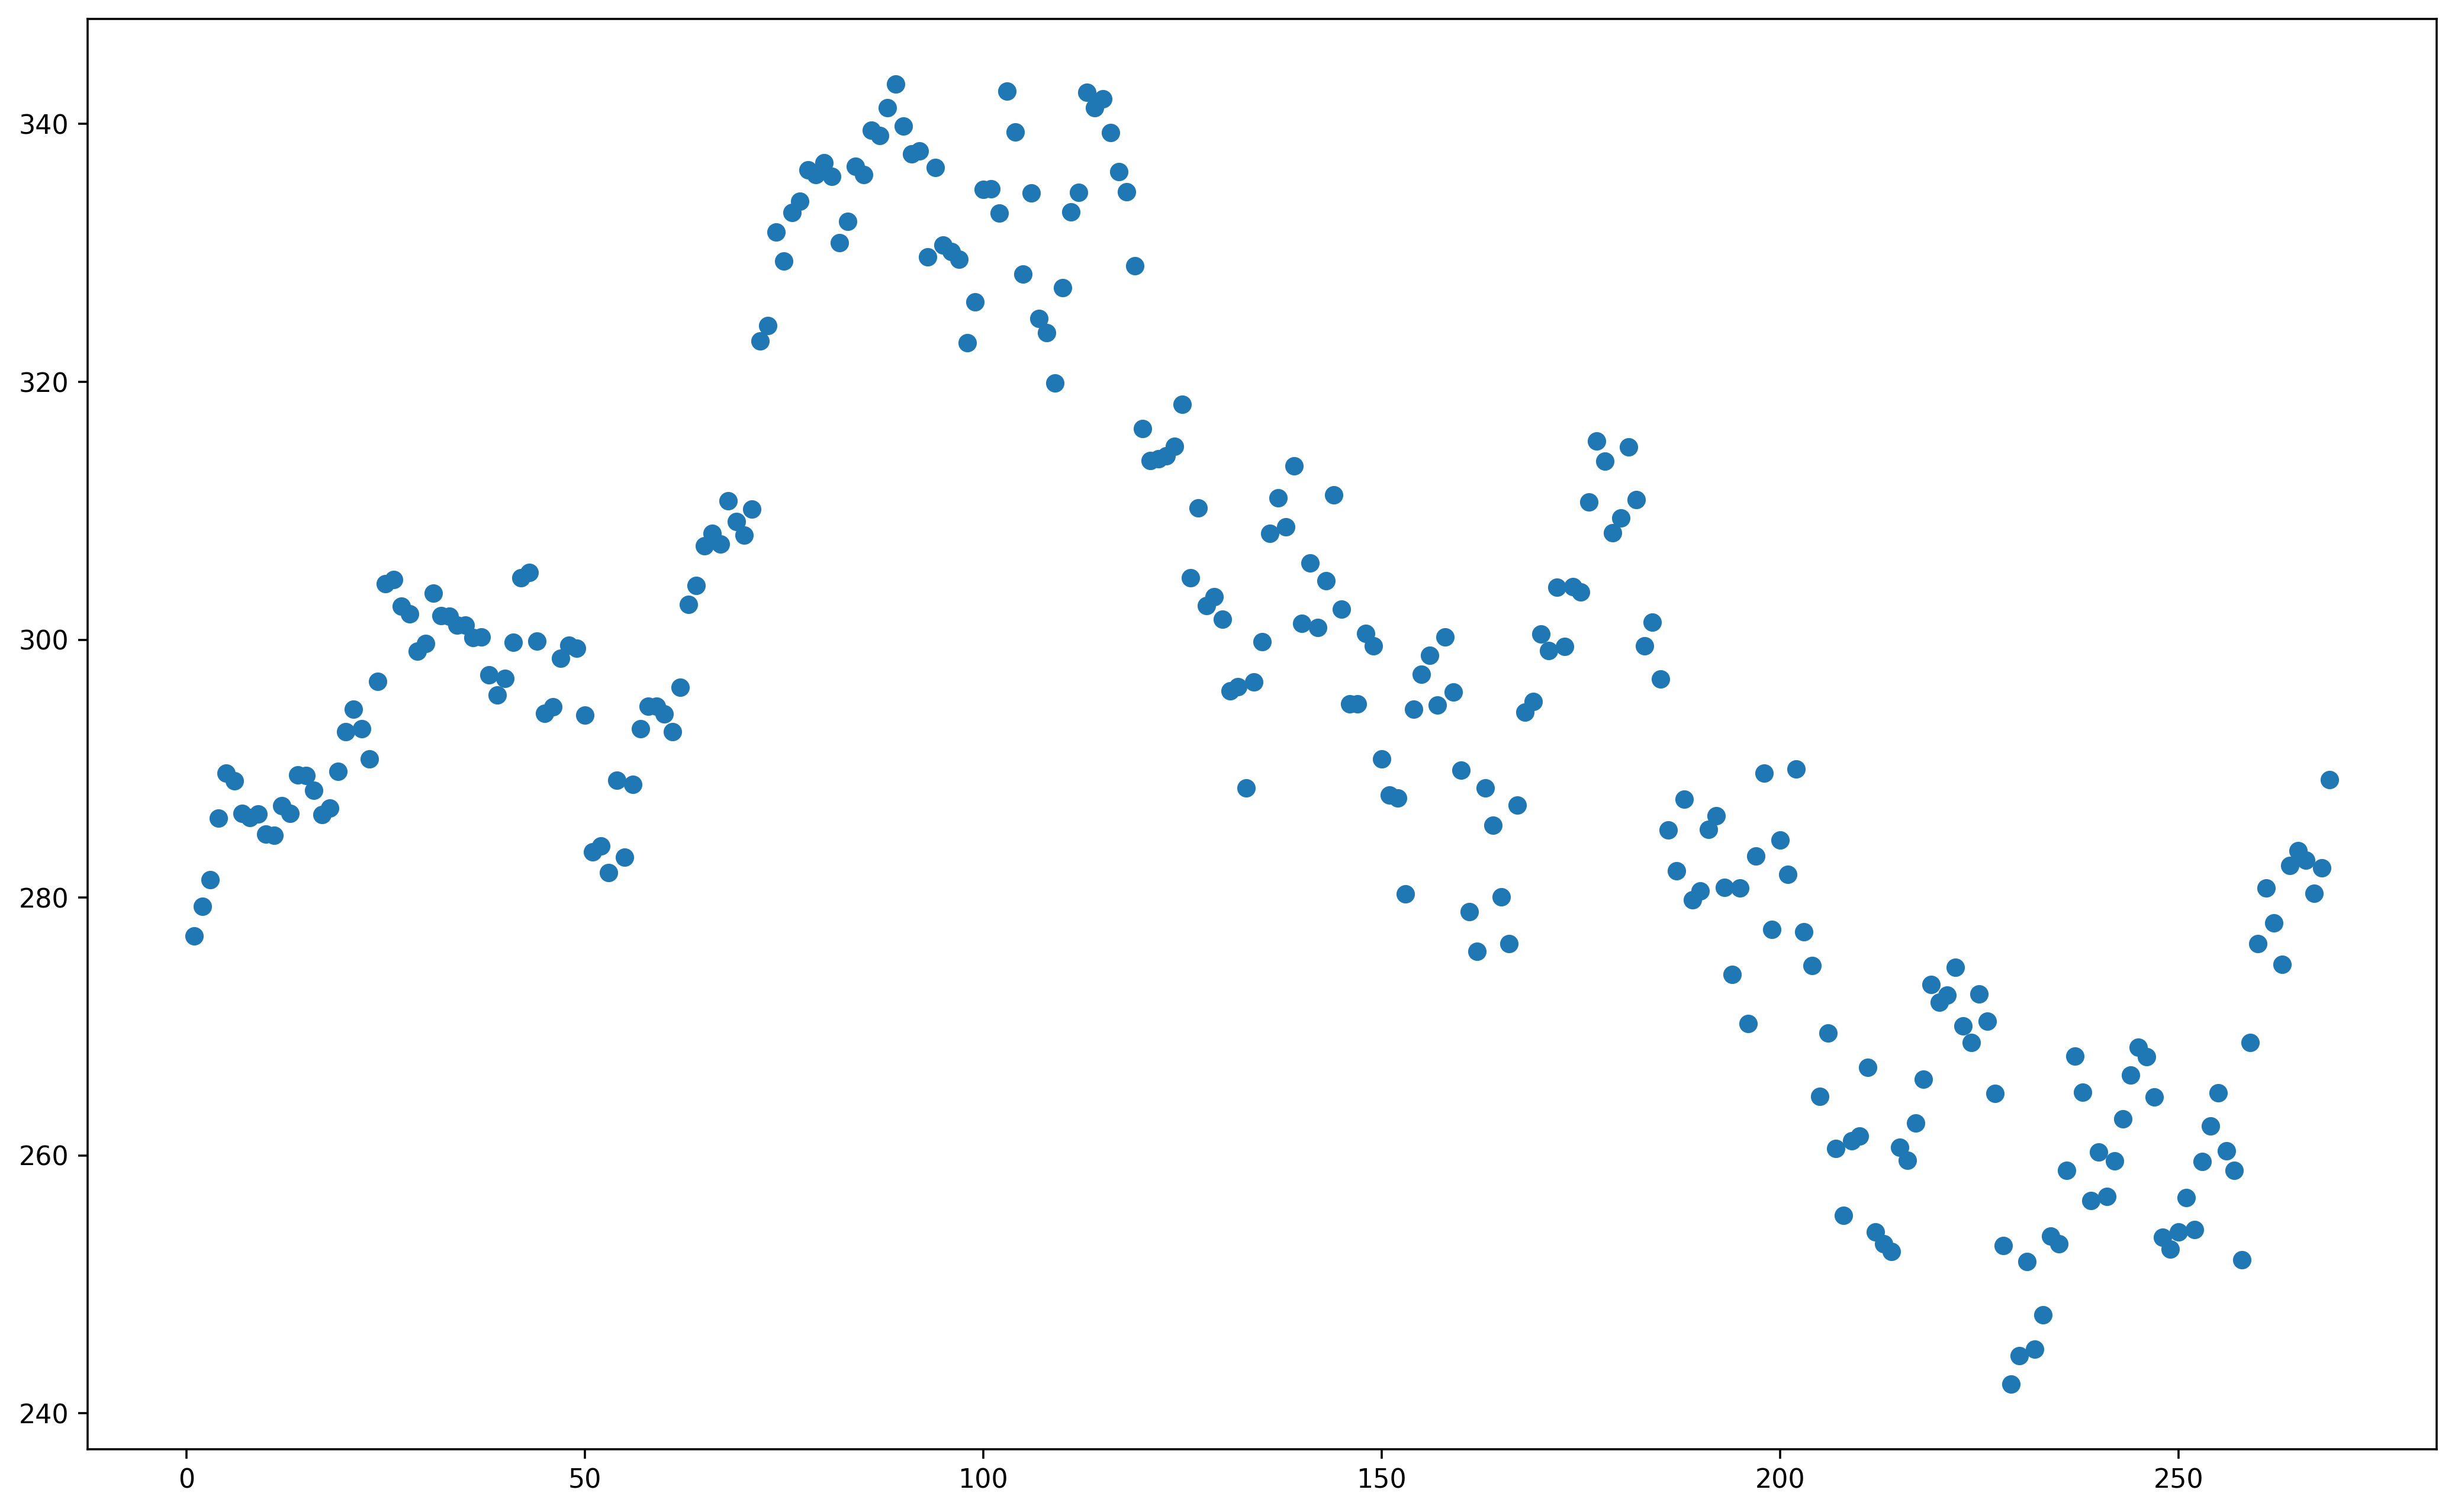

In [163]:
plt.figure(figsize=(16,10),dpi=320)
plt.scatter(np.arange(start=1,stop=270),data[(1257-365+2*4*12):])


## One Month Data

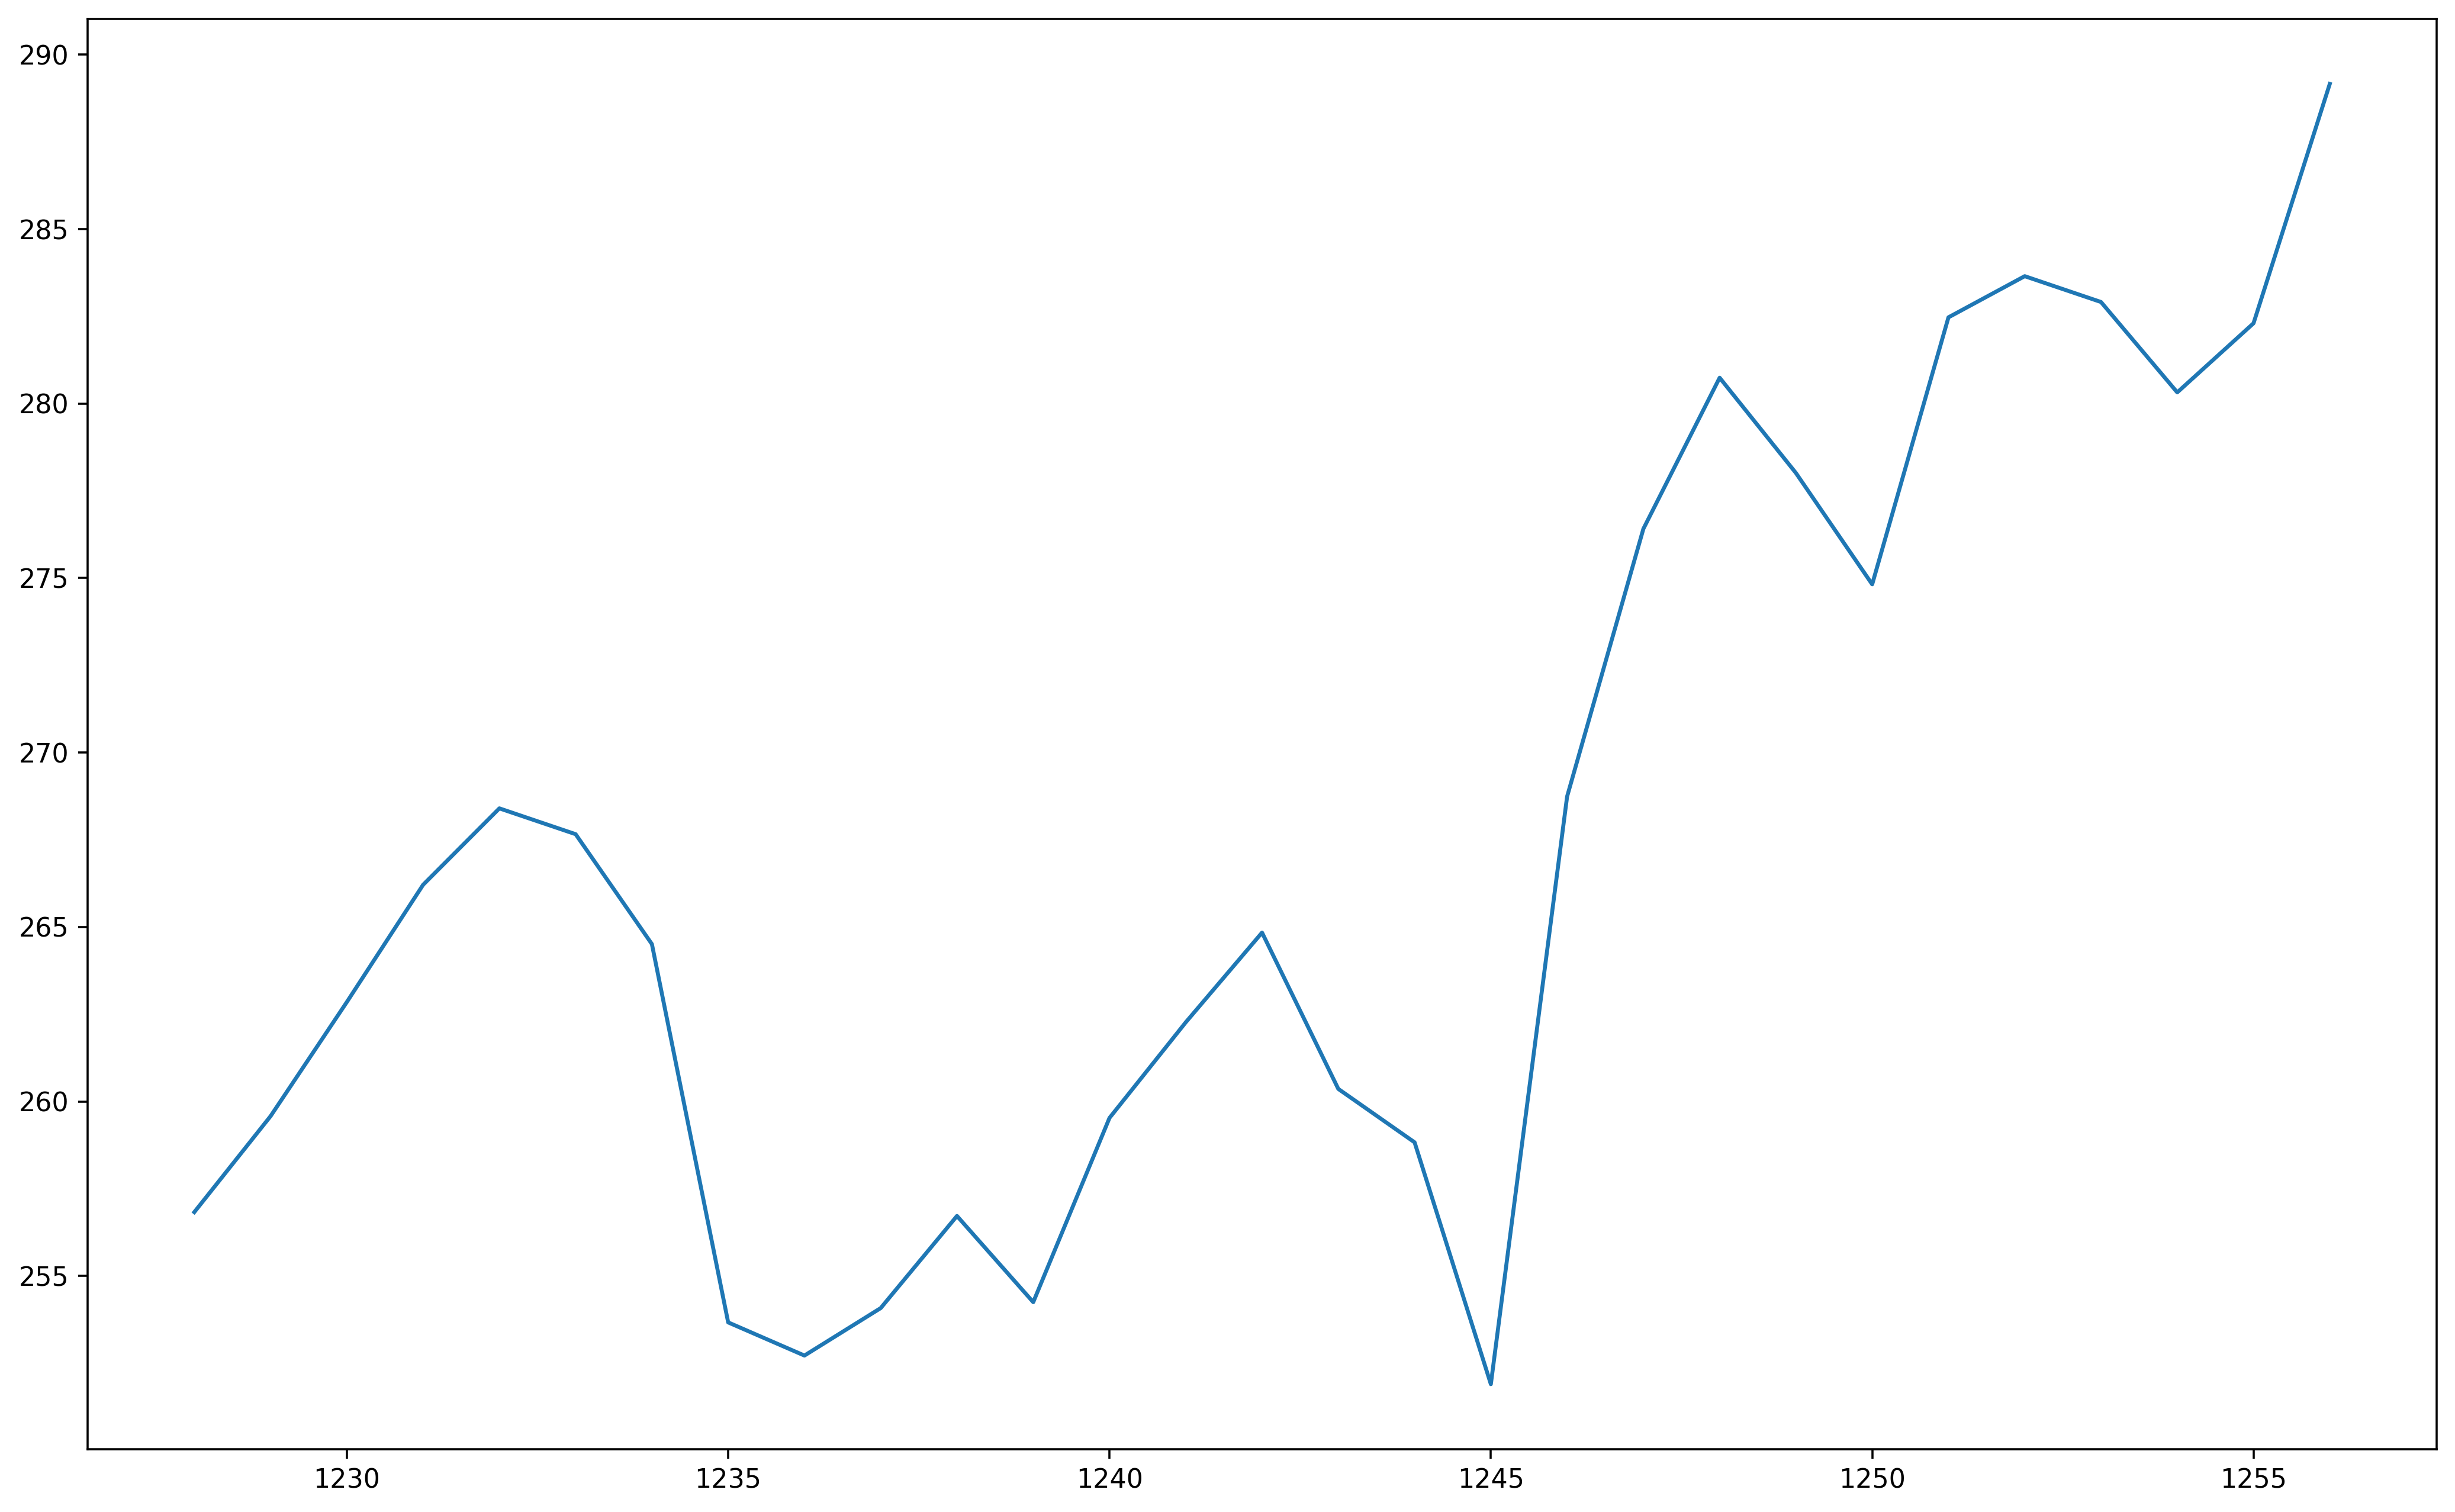

In [164]:
plt.figure(figsize=(16,10),dpi=320)
plt.plot(data[(1258-30):])

In [165]:
import numpy as np

### Feature Scaling (Normalization)

In [166]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))


In [167]:
df1=scaler.fit_transform(np.array(data).reshape(-1,1))

In [168]:
df1

array([[0.00531444],
       [0.00394892],
       [0.00553587],
       ...,
       [0.76826838],
       [0.77557573],
       [0.80089312]])

### Train Test Split

In [169]:
train_size=int(len(df1)*0.65)
test_size=len(df1)-train_size
train_data, test_data=df1[0:train_size,:],df1[train_size:len(df1),:1]

In [170]:
test_data[:5,0]

array([0.51247417, 0.53291999, 0.52882344, 0.53277236, 0.53542958])

In [171]:
train_size, test_size

(817, 440)

In [172]:
import numpy

## Converting time series data to dataset Matrix

In [173]:
def create_dataset(dataset,timestamp=1):
    dataX, dataY =[], []
    for i in  range(len(dataset)-timestamp-1):
        a=dataset[i:(i+timestamp) , 0 ]
        dataX.append(a)
        dataY.append(dataset[i + timestamp, 0])
    return numpy.array(dataX), numpy.array(dataY)

In [174]:
timestamp=100
X_train, y_train = create_dataset(train_data, timestamp)
X_test, ytest =create_dataset(test_data, timestamp)

In [175]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [176]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [177]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss="mean_squared_error",optimizer="adam")

In [178]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_12 (LSTM)              (None, 100, 50)           10400     
                                                                 
 lstm_13 (LSTM)              (None, 100, 50)           20200     
                                                                 
 lstm_14 (LSTM)              (None, 50)                20200     
                                                                 
 dense_4 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [179]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
12/12 [==============================] - 8s 253ms/step - loss: 0.0192 - val_loss: 0.0868
Epoch 2/100
12/12 [==============================] - 2s 134ms/step - loss: 0.0043 - val_loss: 0.0032
Epoch 3/100
12/12 [==============================] - 2s 132ms/step - loss: 0.0015 - val_loss: 0.0024
Epoch 4/100
12/12 [==============================] - 1s 124ms/step - loss: 0.0012 - val_loss: 0.0040
Epoch 5/100
12/12 [==============================] - 1s 123ms/step - loss: 6.7287e-04 - val_loss: 0.0052
Epoch 6/100
12/12 [==============================] - 2s 135ms/step - loss: 7.0420e-04 - val_loss: 0.0023
Epoch 7/100
12/12 [==============================] - 2s 132ms/step - loss: 6.2419e-04 - val_loss: 0.0026
Epoch 8/100
12/12 [==============================] - 2s 135ms/step - loss: 5.7129e-04 - val_loss: 0.0038
Epoch 9/100
12/12 [==============================] - 2s 136ms/step - loss: 5.9180e-04 - val_loss: 0.0042
Epoch 10/100
12/12 [==============================] - 2s 133ms/step - l

In [180]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

11/11 [==============================] - 0s 26ms/step


In [181]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

## RMSE on train and test data

In [182]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

145.15197080508597

In [183]:
math.sqrt(mean_squared_error(ytest,test_predict))

284.18448778020246

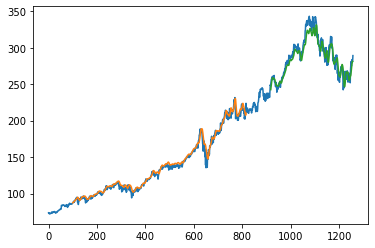

In [184]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [186]:
len(test_data)

440

In [187]:
x_input=test_data[340:].reshape(1,-1)
x_input.shape


(1, 100)

In [188]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()
temp_input

[0.8424859757897842,
 0.8377989371124888,
 0.8558827871272512,
 0.8390168290522586,
 0.8560304103926777,
 0.8544803661056981,
 0.8803882491880719,
 0.8977708886920577,
 0.8920504871567758,
 0.8715677590788307,
 0.8756643046944197,
 0.8961470327723648,
 0.8810525538824916,
 0.8390537348686151,
 0.8459551225273101,
 0.8297165633303809,
 0.7864998523767344,
 0.774689991142604,
 0.7952096250369056,
 0.7664599940950692,
 0.7690064954236786,
 0.7866474756421611,
 0.7905594921759669,
 0.7700767640980217,
 0.7450546206082076,
 0.7697446117508118,
 0.7309935045763212,
 0.7789710658399762,
 0.8026276941245938,
 0.7579347505166811,
 0.7835842928845584,
 0.7736566282846173,
 0.8039193976970769,
 0.7573073516386182,
 0.7476380277531738,
 0.7101786241511661,
 0.7283362857986417,
 0.695305580159433,
 0.6761145556539709,
 0.6974092116917625,
 0.6988116327133156,
 0.7184455270150574,
 0.6714275169766755,
 0.6679583702391496,
 0.6658178328904634,
 0.6956746383229995,
 0.6918733392382639,
 0.702576025981

In [189]:
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)     

[0.7705466]
101
1 day input [0.83779894 0.85588279 0.83901683 0.85603041 0.85448037 0.88038825
 0.89777089 0.89205049 0.87156776 0.8756643  0.89614703 0.88105255
 0.83905373 0.84595512 0.82971656 0.78649985 0.77468999 0.79520963
 0.76645999 0.7690065  0.78664748 0.79055949 0.77007676 0.74505462
 0.76974461 0.7309935  0.77897107 0.80262769 0.75793475 0.78358429
 0.77365663 0.8039194  0.75730735 0.74763803 0.71017862 0.72833629
 0.69530558 0.67611456 0.69740921 0.69881163 0.71844553 0.67142752
 0.66795837 0.66581783 0.69567464 0.69187334 0.70257603 0.71505019
 0.74213906 0.73708296 0.73911278 0.74708444 0.73025539 0.72556835
 0.73940803 0.73169472 0.71095365 0.66740478 0.62780484 0.63603484
 0.66286537 0.63780632 0.64769708 0.67017272 0.66792146 0.6890685
 0.72169324 0.7113227  0.68028491 0.69423531 0.68157662 0.69172572
 0.70379392 0.71619427 0.72427665 0.72154562 0.70992028 0.66991438
 0.66640833 0.67142752 0.68117065 0.67205492 0.69154119 0.70165338
 0.71113818 0.69460437 0.68895778 0

9 day output [[0.7263551]]
10 day input [0.8756643  0.89614703 0.88105255 0.83905373 0.84595512 0.82971656
 0.78649985 0.77468999 0.79520963 0.76645999 0.7690065  0.78664748
 0.79055949 0.77007676 0.74505462 0.76974461 0.7309935  0.77897107
 0.80262769 0.75793475 0.78358429 0.77365663 0.8039194  0.75730735
 0.74763803 0.71017862 0.72833629 0.69530558 0.67611456 0.69740921
 0.69881163 0.71844553 0.67142752 0.66795837 0.66581783 0.69567464
 0.69187334 0.70257603 0.71505019 0.74213906 0.73708296 0.73911278
 0.74708444 0.73025539 0.72556835 0.73940803 0.73169472 0.71095365
 0.66740478 0.62780484 0.63603484 0.66286537 0.63780632 0.64769708
 0.67017272 0.66792146 0.6890685  0.72169324 0.7113227  0.68028491
 0.69423531 0.68157662 0.69172572 0.70379392 0.71619427 0.72427665
 0.72154562 0.70992028 0.66991438 0.66640833 0.67142752 0.68117065
 0.67205492 0.69154119 0.70165338 0.71113818 0.69460437 0.68895778
 0.66338205 0.72553144 0.7538382  0.76981842 0.75974314 0.74797018
 0.77620313 0.78055802

19 day output [[0.7236472]]
20 day input [0.7690065  0.78664748 0.79055949 0.77007676 0.74505462 0.76974461
 0.7309935  0.77897107 0.80262769 0.75793475 0.78358429 0.77365663
 0.8039194  0.75730735 0.74763803 0.71017862 0.72833629 0.69530558
 0.67611456 0.69740921 0.69881163 0.71844553 0.67142752 0.66795837
 0.66581783 0.69567464 0.69187334 0.70257603 0.71505019 0.74213906
 0.73708296 0.73911278 0.74708444 0.73025539 0.72556835 0.73940803
 0.73169472 0.71095365 0.66740478 0.62780484 0.63603484 0.66286537
 0.63780632 0.64769708 0.67017272 0.66792146 0.6890685  0.72169324
 0.7113227  0.68028491 0.69423531 0.68157662 0.69172572 0.70379392
 0.71619427 0.72427665 0.72154562 0.70992028 0.66991438 0.66640833
 0.67142752 0.68117065 0.67205492 0.69154119 0.70165338 0.71113818
 0.69460437 0.68895778 0.66338205 0.72553144 0.7538382  0.76981842
 0.75974314 0.74797018 0.77620313 0.78055802 0.77782699 0.76826838
 0.77557573 0.80089312 0.77054662 0.76850706 0.76468015 0.75953597
 0.7536369  0.7474767

29 day output [[0.74254936]]
[[0.7705466151237488], [0.7685070633888245], [0.7646801471710205], [0.7595359683036804], [0.75363689661026], [0.7474767565727234], [0.7414351105690002], [0.7357854247093201], [0.7307167053222656], [0.7263550758361816], [0.7227793335914612], [0.7200284600257874], [0.7181099057197571], [0.7170024514198303], [0.7166609764099121], [0.7170199155807495], [0.7179965972900391], [0.7194967269897461], [0.7214164137840271], [0.7236471772193909], [0.7260799407958984], [0.7286078333854675], [0.7311305403709412], [0.7335559725761414], [0.7358039021492004], [0.7378067970275879], [0.7395123839378357], [0.7408834099769592], [0.7418978810310364], [0.7425493597984314]]


In [190]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [191]:
import matplotlib.pyplot as plt

In [193]:
len(df1)

1257

## Next One Month Prediction

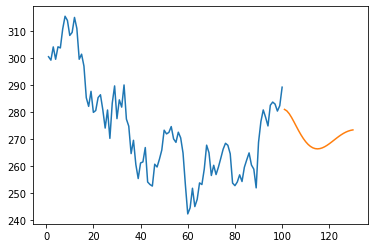

In [194]:
plt.plot(day_new,scaler.inverse_transform(df1[1157:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

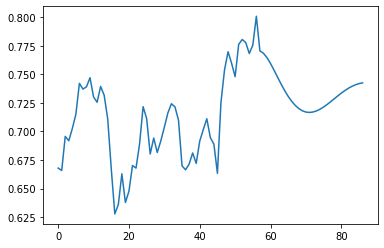

In [198]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

In [199]:
df3=scaler.inverse_transform(df3).tolist()

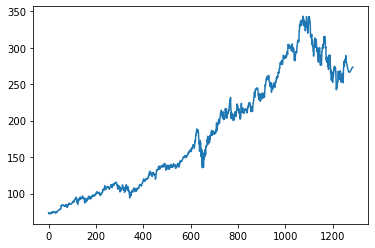

In [200]:
plt.plot(df3)